NAME: ADREETA GUHA    USC ID: 5122431956

Q1. (10 pts.) Use df[’year’] = df[’Date’].dt.year to create a column for the year. Repeat this
step to create columns for the month, day, and hour. Also,
use df[’day of week’] = df[’Date’].dt.dayofweek to create a column for the day of the week.
Fit a multiple regression model with all predictors (new created columns) and with
month, day, hour, day of week as categorical variables. Report the MAPE and r-square.

In [369]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [370]:
df=pd.read_csv('sce.csv')
df.head()

,Date,Load,temp
0,1/1/14 0:00,9891.0,59.4685
1,1/1/14 1:00,9553.0,61.4030
2,1/1/14 2:00,9222.0,55.0310
3,1/1/14 3:00,9024.0,53.1878
4,1/1/14 4:00,8987.0,51.9944


In [371]:
def mean_absolute_percentage_error(y,y_pred):
    y = np.array(y)
    y_pred = np.array(y_pred)
    return 100*np.mean(np.abs((y-y_pred)/y))

In [372]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Hour'] = df['Date'].dt.hour
df['Day_of_Week'] = df['Date'].dt.dayofweek
df.head()

,Date,Load,temp,Year,Month,Day,Hour,Day_of_Week
0,2014-01-01 00:00:00,9891.0,59.4685,2014,1,1,0,2
1,2014-01-01 01:00:00,9553.0,61.4030,2014,1,1,1,2
2,2014-01-01 02:00:00,9222.0,55.0310,2014,1,1,2,2
3,2014-01-01 03:00:00,9024.0,53.1878,2014,1,1,3,2
4,2014-01-01 04:00:00,8987.0,51.9944,2014,1,1,4,2


In [373]:
df.dtypes

Date           datetime64[ns]
Load                  float64
temp                  float64
Year                    int64
Month                   int64
Day                     int64
Hour                    int64
Day_of_Week             int64
dtype: object

In [374]:
df['Month'] = df['Month'].astype('object')
df['Day'] = df['Day'].astype('object')
df['Hour'] = df['Hour'].astype('object')
df['Day_of_Week'] = df['Day_of_Week'].astype('object')

In [375]:
model1 = smf.ols(formula='Load ~ Year + Month + Day + Hour + Day_of_Week',data = df).fit()
df['Load_prediction'] = model1.predict(df)
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Load   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     1897.
Date:                Thu, 14 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:50:18   Log-Likelihood:            -4.2839e+05
No. Observations:               49680   AIC:                         8.569e+05
Df Residuals:                   49608   BIC:                         8.576e+05
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2.236e+05   7482.767     29.878      0.000    2.09e+05    2.38e+05
Month[T.2]        -157.6576     29.272     -5.386      0.000    -215.030    -100.285
Month[T.3]        -181.3029     28.488     -6.364      0.000    -237.140    -125.466
Month[T.4]          -2.0339     28.760     -0.071      0.944     -58.404      54.336
Month[T.5]         322.3307     28.488     11.315      0.000     266.495     378.167
Month[T.6]        1925.0989     28.760     66.937      0.000    1868.729    1981.469
Month[T.7]        3734.7270     28.488    131.098      0.000    3678.890    3790.564
Month[T.8]        3915.8621     28.488    137.458      0.000    3860.026    3971.699
Month[T.9]        2849.9100     30.181     94.428      0.000    2790.755    2909.065
Month[T.10]       1216.5810     29.936     40.639      0.000    1157.906    1275.256
Month[T.11]         46.8105     30.239      1.548      0.122     -12.459     106.080
Month[T.12]        176.6725     29.936      5.902      0.000     117.997     235.348
Day[T.2]            65.2297     46.947      1.389      0.165     -26.786     157.246
Day[T.3]           -17.4502     46.946     -0.372      0.710    -109.464      74.564
Day[T.4]          -181.7149     46.947     -3.871      0.000    -273.731     -89.699
Day[T.5]          -126.2456     46.947     -2.689      0.007    -218.262     -34.229
Day[T.6]           -48.3082     46.947     -1.029      0.303    -140.324      43.708
Day[T.7]            20.0680     46.947      0.427      0.669     -71.948     112.084
Day[T.8]           103.9167     46.946      2.214      0.027      11.903     195.931
Day[T.9]           124.1015     46.947      2.643      0.008      32.085     216.118
Day[T.10]          118.6028     46.946      2.526      0.012      26.589     210.617
Day[T.11]           99.7074     46.947      2.124      0.034       7.691     191.723
Day[T.12]           73.0348     46.947      1.556      0.120     -18.981     165.051
Day[T.13]           95.8191     46.947      2.041      0.041       3.803     187.835
Day[T.14]           95.0909     46.947      2.026      0.043       3.075     187.107
Day[T.15]           79.9453     46.946      1.703      0.089     -12.069     171.959
Day[T.16]           45.1299     46.947      0.961      0.336     -46.886     137.146
Day[T.17]           -2.6733     46.946     -0.057      0.955     -94.687      89.341
Day[T.18]          -69.7235     46.947     -1.485      0.138    -161.740      22.293
Day[T.19]          -19.3168     46.947     -0.411      0.681    -111.333      72.699
Day[T.20]           57.1106     46.947      1.216      0.224     -34.905     149.127
Day[T.21]           32.7462     46.947      0.698      0.485     -59.270     124.762
Day[T.22]          -10.7298     46.946     -0.229      0.819    -102.744      81.284
Day[T.23]           -1.

In [376]:

df.head()


,Date,Load,temp,Year,Month,Day,Hour,Day_of_Week,Load_prediction
0,2014-01-01 00:00:00,9891.0,59.4685,2014,1,1,0,2,9918.880255
1,2014-01-01 01:00:00,9553.0,61.4030,2014,1,1,1,2,9436.421064
2,2014-01-01 02:00:00,9222.0,55.0310,2014,1,1,2,2,9118.871381
3,2014-01-01 03:00:00,9024.0,53.1878,2014,1,1,3,2,8960.476921
4,2014-01-01 04:00:00,8987.0,51.9944,2014,1,1,4,2,9053.230022


In [377]:
MAPE=mean_absolute_percentage_error(df['Load'],df['Load_prediction'])
print(MAPE)

8.06969060800614


ANSWER:
MAPE=8.06969060800614 
R-SQUARED=0.731

Q2. (10 pts.)Plot of Load as a function of time. This is a line plot (with the x-axis displaying the years). Column Date should be the dataframe index. Use df.Load.plot().

In [378]:
df=df.set_index('Date')
df.head()

,Load,temp,Year,Month,Day,Hour,Day_of_Week,Load_prediction
Date,,,,,,,,
2014-01-01 00:00:00,9891.0,59.4685,2014,1,1,0,2,9918.880255
2014-01-01 01:00:00,9553.0,61.4030,2014,1,1,1,2,9436.421064
2014-01-01 02:00:00,9222.0,55.0310,2014,1,1,2,2,9118.871381
2014-01-01 03:00:00,9024.0,53.1878,2014,1,1,3,2,8960.476921
2014-01-01 04:00:00,8987.0,51.9944,2014,1,1,4,2,9053.230022


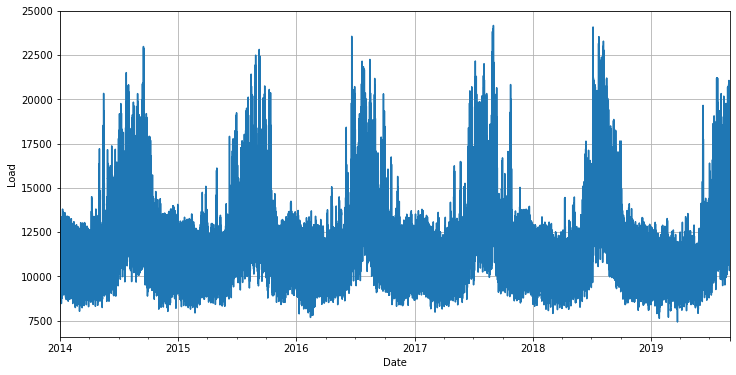

In [379]:
plt.figure(figsize=(12,6))
df.Load.plot()
plt.xlabel('Date')
plt.ylabel('Load')
plt.grid()

Q3. (10 pts.) Scatter Plot of Load vs temp with the x-axis displaying the Temperature.

Text(0, 0.5, 'Load')

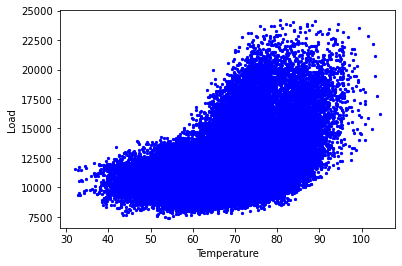

In [380]:

x=df['temp']
y=df['Load']
plt.scatter(x,y,s=5,c='b')
plt.xlabel('Temperature')
plt.ylabel('Load')


In [381]:
df1=df.sort_values('temp')
df1.head()

,Load,temp,Year,Month,Day,Hour,Day_of_Week,Load_prediction
Date,,,,,,,,
2015-12-28 14:00:00,11591.0,32.1602,2015,12,28,14,0,12606.025559
2015-12-28 13:00:00,11460.0,32.8433,2015,12,28,13,0,12306.483444
2015-01-01 13:00:00,9391.0,32.8955,2015,1,1,13,3,12202.597440
2015-01-02 14:00:00,10509.0,32.9927,2015,1,2,14,4,12449.952767
2015-01-01 15:00:00,9494.0,33.1340,2015,1,1,15,3,12763.935685


In [382]:
Temperature=df1.temp
Load=df1.Load
Temperature.shape

(49680,)

In [383]:
Temperature1=Temperature.values.reshape(-1,1)
Temperature1[:5]

array([[32.1602],
       [32.8433],
       [32.8955],
       [32.9927],
       [33.134 ]])

In [384]:
Temperature2=PolynomialFeatures(degree=2).fit_transform(Temperature1)
Temperature2

array([[1.00000000e+00, 3.21602000e+01, 1.03427846e+03],
       [1.00000000e+00, 3.28433000e+01, 1.07868235e+03],
       [1.00000000e+00, 3.28955000e+01, 1.08211392e+03],
       ...,
       [1.00000000e+00, 1.03284500e+02, 1.06676879e+04],
       [1.00000000e+00, 1.03752000e+02, 1.07644775e+04],
       [1.00000000e+00, 1.04270500e+02, 1.08723372e+04]])

In [385]:
Temperature3=pd.DataFrame(Temperature2)
Temperature3

,0,1,2
0,1.0,32.1602,1034.278464
1,1.0,32.8433,1078.682355
2,1.0,32.8955,1082.113920
3,1.0,32.9927,1088.518253
4,1.0,33.1340,1097.861956
...,...,...,...
49675,1.0,102.6695,10541.026230
49676,1.0,103.2260,10655.607076
49677,1.0,103.2845,10667.687940
49678,1.0,103.7520,10764.477504


In [386]:
model=LinearRegression().fit(Temperature3,Load)
df1['Load_pred']=model.predict(Temperature2)
df1.head()

,Load,temp,Year,Month,Day,Hour,Day_of_Week,Load_prediction,Load_pred
Date,,,,,,,,,
2015-12-28 14:00:00,11591.0,32.1602,2015,12,28,14,0,12606.025559,11764.824506
2015-12-28 13:00:00,11460.0,32.8433,2015,12,28,13,0,12306.483444,11681.943990
2015-01-01 13:00:00,9391.0,32.8955,2015,1,1,13,3,12202.597440,11675.737855
2015-01-02 14:00:00,10509.0,32.9927,2015,1,2,14,4,12449.952767,11664.229762
2015-01-01 15:00:00,9494.0,33.1340,2015,1,1,15,3,12763.935685,11647.612165


Text(0, 0.5, 'Load')

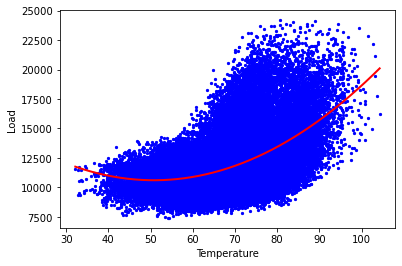

In [387]:

plt.scatter(df['temp'],df['Load'],s=5,c='b')
plt.plot(Temperature,df1['Load_pred'],lw=2,c='r')
plt.xlabel('Temperature')
plt.ylabel('Load')


Q4. (10 pts.) Fit a multiple regression model by adding to the first model the temperature squared, the
interaction of temperature and hour, and, the interaction of squared temperature and hour. Report
the MAPE and r-square.

In [388]:
df['Temp2']=df['temp']**2
df.head()


,Load,temp,Year,Month,Day,Hour,Day_of_Week,Load_prediction,Temp2
Date,,,,,,,,,
2014-01-01 00:00:00,9891.0,59.4685,2014,1,1,0,2,9918.880255,3536.502492
2014-01-01 01:00:00,9553.0,61.4030,2014,1,1,1,2,9436.421064,3770.328409
2014-01-01 02:00:00,9222.0,55.0310,2014,1,1,2,2,9118.871381,3028.410961
2014-01-01 03:00:00,9024.0,53.1878,2014,1,1,3,2,8960.476921,2828.942069
2014-01-01 04:00:00,8987.0,51.9944,2014,1,1,4,2,9053.230022,2703.417631


In [389]:
model2=smf.ols(formula='Load~Year+Month+Day+Hour+Day_of_Week+Temp2+temp*Hour+Temp2*Hour',data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Load   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     3687.
Date:                Thu, 14 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:50:47   Log-Likelihood:            -4.0416e+05
No. Observations:               49680   AIC:                         8.086e+05
Df Residuals:                   49560   BIC:                         8.096e+05
Df Model:                         119                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2.141e+05   4761.884     44.957      0.000    2.05e+05    2.23e+05
Month[T.2]        -182.6570     18.036    -10.127      0.000    -218.008    -147.306
Month[T.3]        -236.9964     18.342    -12.921      0.000    -272.947    -201.046
Month[T.4]        -279.1917     19.430    -14.369      0.000    -317.275    -241.108
Month[T.5]        -155.5985     19.725     -7.889      0.000    -194.259    -116.938
Month[T.6]         581.7252     22.131     26.285      0.000     538.347     625.103
Month[T.7]        1319.5374     24.543     53.764      0.000    1271.433    1367.642
Month[T.8]        1516.2622     24.586     61.671      0.000    1468.073    1564.452
Month[T.9]         882.5152     24.072     36.661      0.000     835.333     929.698
Month[T.10]        208.0304     21.831      9.529      0.000     165.241     250.820
Month[T.11]        -23.6435     19.421     -1.217      0.223     -61.708      14.421
Month[T.12]        176.5232     18.416      9.585      0.000     140.428     212.619
Day[T.2]            82.6795     28.842      2.867      0.004      26.148     139.211
Day[T.3]            13.3143     28.845      0.462      0.644     -43.223      69.851
Day[T.4]           -22.9317     28.864     -0.794      0.427     -79.505      33.642
Day[T.5]            72.6998     28.878      2.517      0.012      16.098     129.301
Day[T.6]            97.8182     28.880      3.387      0.001      41.213     154.424
Day[T.7]            79.7538     28.863      2.763      0.006      23.183     136.325
Day[T.8]           112.2900     28.872      3.889      0.000      55.700     168.880
Day[T.9]           102.8092     28.888      3.559      0.000      46.188     159.431
Day[T.10]          155.3912     28.879      5.381      0.000      98.787     211.995
Day[T.11]          157.4030     28.895      5.447      0.000     100.769     214.037
Day[T.12]          167.3792     28.884      5.795      0.000     110.767     223.992
Day[T.13]          151.5144     28.882      5.246      0.000      94.906     208.123
Day[T.14]          149.4521     28.890      5.173      0.000      92.828     206.076
Day[T.15]           88.7346     28.886      3.072      0.002      32.118     145.351
Day[T.16]           65.7948     28.887      2.278      0.023       9.177     122.413
Day[T.17]           86.6180     28.879      2.999      0.003      30.016     143.221
Day[T.18]           77.9038     28.878      2.698      0.007      21.303     134.504
Day[T.19]           86.8631     28.868      3.009      0.003      30.281     143.445
Day[T.20]           52.2629     28.855      1.811      0.070      -4.294     108.820
Day[T.21]           75.5061     28.865      2.616      0.009      18.930     132.082
Day[T.22]           66.7062     28.865      2.311      0.021      10.131     123.281
Day[T.23]           55.

In [390]:
df['Load_Predicted2']=model2.predict(df)

In [391]:
MAPE2=mean_absolute_percentage_error(df['Load'],df['Load_Predicted2'])
MAPE2

5.171918662674816

MAPE = 5.171918662674816
R Squared = 0.899

Q5. (10 pts.) Use df[’lag24’] = df[’Load’].shift(24) to add the Load shifted 24 hours as an
additional predictor. Fit the MLR model and report the MAPE and r-square.


In [392]:
df['lag24'] = df['Load'].shift(24)
df.iloc[24:29]

,Load,temp,Year,Month,Day,Hour,Day_of_Week,Load_prediction,Temp2,Load_Predicted2,lag24
Date,,,,,,,,,,,
2014-01-02 00:00:00,9191.0,68.0000,2014,1,2,0,3,9954.957999,4624.000000,10127.179518,9891.0
2014-01-02 01:00:00,8860.0,61.5641,2014,1,2,1,3,9472.498808,3790.138409,9871.350200,9553.0
2014-01-02 02:00:00,8682.0,57.2234,2014,1,2,2,3,9154.949126,3274.517508,9760.510817,9222.0
2014-01-02 03:00:00,8676.0,54.9374,2014,1,2,3,3,8996.554666,3018.117919,9738.107360,9024.0
2014-01-02 04:00:00,8917.0,54.9734,2014,1,2,4,3,9089.307767,3022.074708,9841.304676,8987.0


In [393]:
df2=df.dropna()
df2.head()

,Load,temp,Year,Month,Day,Hour,Day_of_Week,Load_prediction,Temp2,Load_Predicted2,lag24
Date,,,,,,,,,,,
2014-01-02 00:00:00,9191.0,68.0000,2014,1,2,0,3,9954.957999,4624.000000,10127.179518,9891.0
2014-01-02 01:00:00,8860.0,61.5641,2014,1,2,1,3,9472.498808,3790.138409,9871.350200,9553.0
2014-01-02 02:00:00,8682.0,57.2234,2014,1,2,2,3,9154.949126,3274.517508,9760.510817,9222.0
2014-01-02 03:00:00,8676.0,54.9374,2014,1,2,3,3,8996.554666,3018.117919,9738.107360,9024.0
2014-01-02 04:00:00,8917.0,54.9734,2014,1,2,4,3,9089.307767,3022.074708,9841.304676,8987.0


In [394]:
model3=smf.ols(formula='Load~Year+Month+Day+Hour+Day_of_Week+Temp2+temp*Hour+Temp2*Hour+lag24',data=df2).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Load   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     6578.
Date:                Thu, 14 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:50:54   Log-Likelihood:            -3.9052e+05
No. Observations:               49656   AIC:                         7.813e+05
Df Residuals:                   49535   BIC:                         7.824e+05
Df Model:                         120                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         9.218e+04   3693.840     24.956      0.000    8.49e+04    9.94e+04
Month[T.2]         -90.4349     13.785     -6.560      0.000    -117.454     -63.416
Month[T.3]        -101.0505     14.025     -7.205      0.000    -128.539     -73.562
Month[T.4]        -121.9727     14.858     -8.209      0.000    -151.095     -92.851
Month[T.5]         -81.5896     15.063     -5.417      0.000    -111.113     -52.067
Month[T.6]         199.8247     17.009     11.748      0.000     166.487     233.162
Month[T.7]         421.1436     19.321     21.797      0.000     383.275     459.013
Month[T.8]         462.6263     19.571     23.638      0.000     424.267     500.986
Month[T.9]         191.5086     18.729     10.225      0.000     154.800     228.217
Month[T.10]        -16.1077     16.703     -0.964      0.335     -48.846      16.631
Month[T.11]        -19.7848     14.828     -1.334      0.182     -48.848       9.279
Month[T.12]         61.6095     14.079      4.376      0.000      34.014      89.205
Day[T.2]           120.7136     22.084      5.466      0.000      77.428     163.999
Day[T.3]            -8.9270     22.084     -0.404      0.686     -52.212      34.358
Day[T.4]           -62.9541     22.097     -2.849      0.004    -106.265     -19.643
Day[T.5]           108.2402     22.110      4.895      0.000      64.904     151.577
Day[T.6]           126.9684     22.111      5.742      0.000      83.631     170.306
Day[T.7]           108.0249     22.098      4.888      0.000      64.713     151.337
Day[T.8]           128.0017     22.104      5.791      0.000      84.677     171.326
Day[T.9]            84.9274     22.114      3.840      0.000      41.583     128.272
Day[T.10]           94.3631     22.109      4.268      0.000      51.029     137.697
Day[T.11]           90.8766     22.120      4.108      0.000      47.521     134.233
Day[T.12]           92.7109     22.113      4.193      0.000      49.368     136.054
Day[T.13]          112.6834     22.110      5.096      0.000      69.347     156.020
Day[T.14]           97.3033     22.117      4.400      0.000      53.955     140.652
Day[T.15]           60.0054     22.113      2.714      0.007      16.663     103.347
Day[T.16]           40.0282     22.113      1.810      0.070      -3.313      83.370
Day[T.17]           45.4737     22.108      2.057      0.040       2.141      88.806
Day[T.18]           35.7719     22.107      1.618      0.106      -7.559      79.103
Day[T.19]          106.0018     22.102      4.796      0.000      62.682     149.322
Day[T.20]           99.0703     22.094      4.484      0.000      55.765     142.375
Day[T.21]           51.2958     22.098      2.321      0.020       7.983      94.608
Day[T.22]           39.0712     22.098      1.768      0.077      -4.240      82.383
Day[T.23]           64.

In [395]:
df2['Load_Predicted3']=model3.predict(df2)
df2.head()

<ipython-input-395-eb37596eb2da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Load_Predicted3']=model3.predict(df2)


,Load,temp,Year,Month,Day,Hour,Day_of_Week,Load_prediction,Temp2,Load_Predicted2,lag24,Load_Predicted3
Date,,,,,,,,,,,,
2014-01-02 00:00:00,9191.0,68.0000,2014,1,2,0,3,9954.957999,4624.000000,10127.179518,9891.0,9994.203737
2014-01-02 01:00:00,8860.0,61.5641,2014,1,2,1,3,9472.498808,3790.138409,9871.350200,9553.0,9712.469264
2014-01-02 02:00:00,8682.0,57.2234,2014,1,2,2,3,9154.949126,3274.517508,9760.510817,9222.0,9483.744623
2014-01-02 03:00:00,8676.0,54.9374,2014,1,2,3,3,8996.554666,3018.117919,9738.107360,9024.0,9359.716397
2014-01-02 04:00:00,8917.0,54.9734,2014,1,2,4,3,9089.307767,3022.074708,9841.304676,8987.0,9374.209155


In [396]:
MAPE3=mean_absolute_percentage_error(df2['Load'],df2['Load_Predicted3'])
MAPE3

3.843793964346837

MAPE = 3.843793964346837
R SQUARE = 0.941

Q6. (10 pts.) Use sm.graphics.tsa.plot_pacf(load, lags = 60) to plot partial autocorrelations
(adjust the argument lags = 60 as needed). Lags with a large partial autocorrelations (+ or -)
should be good predictors. Fit a MLR model with the additional lags found and report the MAPE
and r-square.

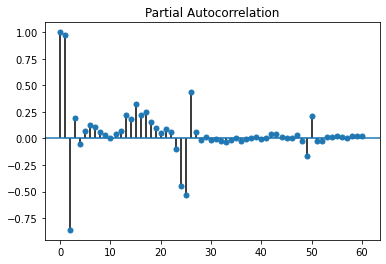

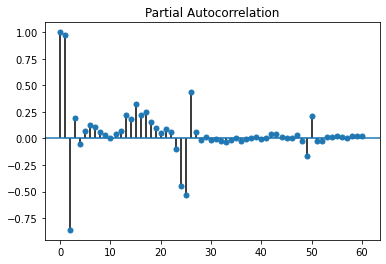

In [397]:
sm.graphics.tsa.plot_pacf(df['Load'], lags = 60)

In [398]:
df['lag15']=df['Load'].shift(15)
df['lag16']=df['Load'].shift(16)
df['lag17']=df['Load'].shift(17)
df['lag18']=df['Load'].shift(18)
df['lag21']=df['Load'].shift(21)
df['lag23'] = df['Load'].shift(23)
df['lag25'] = df['Load'].shift(25)
df['lag26'] = df['Load'].shift(26)
df['lag49'] = df['Load'].shift(49)
df['lag50'] = df['Load'].shift(50)
df.head()



,Load,temp,Year,Month,Day,Hour,Day_of_Week,Load_prediction,Temp2,Load_Predicted2,...,lag15,lag16,lag17,lag18,lag21,lag23,lag25,lag26,lag49,lag50
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,9891.0,59.4685,2014,1,1,0,2,9918.880255,3536.502492,10385.982918,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 01:00:00,9553.0,61.4030,2014,1,1,1,2,9436.421064,3770.328409,9833.076333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 02:00:00,9222.0,55.0310,2014,1,1,2,2,9118.871381,3028.410961,9843.968668,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 03:00:00,9024.0,53.1878,2014,1,1,3,2,8960.476921,2828.942069,9812.090217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 04:00:00,8987.0,51.9944,2014,1,1,4,2,9053.230022,2703.417631,10007.600336,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [399]:
df3=df.dropna()
df3.tail()

,Load,temp,Year,Month,Day,Hour,Day_of_Week,Load_prediction,Temp2,Load_Predicted2,...,lag15,lag16,lag17,lag18,lag21,lag23,lag25,lag26,lag49,lag50
Date,,,,,,,,,,,,,,,,,,,,,
2019-09-01 19:00:00,17139.0,88.0080,2019,9,1,19,6,14081.619818,7745.408064,15702.488520,...,10364.0,10585.0,11047.0,11615.0,14613.0,16886.0,18533.0,19035.0,19827.0,20657.0
2019-09-01 20:00:00,16516.0,89.1480,2019,9,1,20,6,13906.964913,7947.365904,15333.630302,...,10358.0,10364.0,10585.0,11047.0,13388.0,15838.0,17656.0,18533.0,18757.0,19827.0
2019-09-01 21:00:00,15667.0,88.8970,2019,9,1,21,6,13319.450266,7902.676609,14302.483907,...,10325.0,10358.0,10364.0,10585.0,12424.0,14613.0,16886.0,17656.0,17836.0,18757.0
2019-09-01 22:00:00,14515.0,89.1035,2019,9,1,22,6,12381.994874,7939.433712,13080.855305,...,10415.0,10325.0,10358.0,10364.0,11615.0,13388.0,15838.0,16886.0,16639.0,17836.0
2019-09-01 23:00:00,13353.0,88.4475,2019,9,1,23,6,11430.838087,7822.960256,11751.499904,...,10962.0,10415.0,10325.0,10358.0,11047.0,12424.0,14613.0,15838.0,15282.0,16639.0


In [400]:
model4=smf.ols(formula='Load~Year+Month+Day+Hour+Day_of_Week+Temp2+temp*Hour+Temp2*Hour+lag24+lag15+lag16+lag17+lag18+lag21+lag23+lag25+lag26+lag49+lag50',data=df3).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Load   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     6506.
Date:                Thu, 14 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:51:04   Log-Likelihood:            -3.8869e+05
No. Observations:               49630   AIC:                         7.777e+05
Df Residuals:                   49499   BIC:                         7.788e+05
Df Model:                         130                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         8.119e+04   3624.233     22.403      0.000    7.41e+04    8.83e+04
Month[T.2]         -78.4104     13.375     -5.862      0.000    -104.626     -52.194
Month[T.3]         -83.0685     13.623     -6.098      0.000    -109.770     -56.367
Month[T.4]        -100.7498     14.432     -6.981      0.000    -129.037     -72.462
Month[T.5]         -47.1543     14.629     -3.223      0.001     -75.828     -18.481
Month[T.6]         227.4520     16.587     13.713      0.000     194.941     259.963
Month[T.7]         466.7390     19.158     24.363      0.000     429.189     504.289
Month[T.8]         503.5179     19.523     25.791      0.000     465.252     541.784
Month[T.9]         251.8532     18.497     13.616      0.000     215.598     288.108
Month[T.10]         20.3325     16.270      1.250      0.211     -11.557      52.222
Month[T.11]         -9.4433     14.382     -0.657      0.511     -37.631      18.745
Month[T.12]         55.3213     13.653      4.052      0.000      28.561      82.081
Day[T.2]           110.0936     21.455      5.131      0.000      68.041     152.146
Day[T.3]           -29.1779     21.393     -1.364      0.173     -71.108      12.753
Day[T.4]           -65.6323     21.389     -3.069      0.002    -107.554     -23.710
Day[T.5]           112.7165     21.402      5.267      0.000      70.768     154.665
Day[T.6]           103.5456     21.413      4.836      0.000      61.575     145.516
Day[T.7]            86.5583     21.401      4.045      0.000      44.612     128.505
Day[T.8]           107.7454     21.405      5.034      0.000      65.791     149.700
Day[T.9]            62.4029     21.414      2.914      0.004      20.431     104.375
Day[T.10]           80.5786     21.403      3.765      0.000      38.628     122.529
Day[T.11]           75.1333     21.415      3.508      0.000      33.160     117.106
Day[T.12]           79.3290     21.408      3.706      0.000      37.369     121.289
Day[T.13]          100.0917     21.403      4.676      0.000      58.141     142.042
Day[T.14]           75.5517     21.413      3.528      0.000      33.581     117.522
Day[T.15]           45.5244     21.406      2.127      0.033       3.568      87.481
Day[T.16]           30.1236     21.405      1.407      0.159     -11.831      72.078
Day[T.17]           34.9207     21.400      1.632      0.103      -7.024      76.866
Day[T.18]           24.9288     21.400      1.165      0.244     -17.015      66.873
Day[T.19]          100.1984     21.394      4.683      0.000      58.265     142.132
Day[T.20]           85.3343     21.393      3.989      0.000      43.403     127.266
Day[T.21]           36.4075     21.398      1.701      0.089      -5.533      78.348
Day[T.22]           33.1308     21.391      1.549      0.121      -8.795      75.057
Day[T.23]           55.

In [401]:
df3['Load_Predicted4']=model4.predict(df3)
df3.head()

<ipython-input-401-2b00f7bad395>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Load_Predicted4']=model4.predict(df3)


,Load,temp,Year,Month,Day,Hour,Day_of_Week,Load_prediction,Temp2,Load_Predicted2,...,lag16,lag17,lag18,lag21,lag23,lag25,lag26,lag49,lag50,Load_Predicted4
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-03 02:00:00,8934.0,62.6225,2014,1,3,2,4,8954.852875,3921.577506,9400.791344,...,11673.0,11458.0,11157.0,9553.0,8676.0,8860.0,9191.0,9553.0,9891.0,8852.618629
2014-01-03 03:00:00,8845.0,58.5662,2014,1,3,3,4,8796.458415,3429.999782,9376.813412,...,11712.0,11673.0,11458.0,10236.0,8917.0,8682.0,8860.0,9222.0,9553.0,8936.307830
2014-01-03 04:00:00,9057.0,58.0370,2014,1,3,4,4,8889.211516,3368.293369,9507.183430,...,11772.0,11712.0,11673.0,10666.0,9553.0,8676.0,8682.0,9024.0,9222.0,9169.769226
2014-01-03 05:00:00,9525.0,55.8950,2014,1,3,5,4,9304.706871,3124.251025,10042.738129,...,11710.0,11772.0,11712.0,11157.0,10236.0,8917.0,8676.0,8987.0,9024.0,9850.093124
2014-01-03 06:00:00,10423.0,54.4388,2014,1,3,6,4,9892.173994,2963.582945,10792.311723,...,11708.0,11710.0,11772.0,11458.0,10666.0,9553.0,8917.0,9028.0,8987.0,10708.038780


In [402]:
MAPE4=mean_absolute_percentage_error(df3['Load'],df3['Load_Predicted4'])
MAPE4

3.747646998574874

MAPE=3.747646998574874 R SQUARE=0.945

Q7. (20 pts.) Split the data into a test set (2019 load values) and a train set (all other years). Fit the
best model found and report the MAPE and r-square for the test set.

In [403]:
df_test=df3.loc[df.Year==2019]
df_train=df3.loc[df.Year!=2019]
df_test.head()

,Load,temp,Year,Month,Day,Hour,Day_of_Week,Load_prediction,Temp2,Load_Predicted2,...,lag16,lag17,lag18,lag21,lag23,lag25,lag26,lag49,lag50,Load_Predicted4
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,9761.0,57.92850,2019,1,1,0,1,9367.734356,3355.711112,10022.582677,...,10309.0,10076.0,9867.0,8707.0,8967.0,9883.0,10573.0,10369.0,10986.0,9524.464258
2019-01-01 01:00:00,9438.0,57.03736,2019,1,1,1,1,8885.275165,3253.260436,9590.048014,...,10426.0,10309.0,10076.0,8881.0,8755.0,9352.0,9883.0,9819.0,10369.0,9106.871632
2019-01-01 02:00:00,9177.0,55.31236,2019,1,1,2,1,8567.725482,3059.457169,9335.954241,...,10382.0,10426.0,10309.0,9290.0,8707.0,8967.0,9352.0,9451.0,9819.0,8865.259938
2019-01-01 03:00:00,9024.0,52.90550,2019,1,1,3,1,8409.331022,2798.991930,9343.557499,...,10234.0,10382.0,10426.0,9867.0,8881.0,8755.0,8967.0,9239.0,9451.0,8853.562897
2019-01-01 04:00:00,9015.0,50.70200,2019,1,1,4,1,8502.084123,2570.692804,9629.910896,...,10040.0,10234.0,10382.0,10076.0,9290.0,8707.0,8755.0,9137.0,9239.0,9091.621707


In [404]:
model5=smf.ols(formula='Load~Year+Month+Day+Hour+Day_of_Week+Temp2+temp*Hour+Temp2*Hour+lag24+lag15+lag16+lag17+lag18+lag21+lag23+lag25+lag26+lag49+lag50',data=df_train).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Load   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     5768.
Date:                Thu, 14 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:51:10   Log-Likelihood:            -3.4288e+05
No. Observations:               43774   AIC:                         6.860e+05
Df Residuals:                   43643   BIC:                         6.872e+05
Df Model:                         130                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.895e+04   4300.491     11.381      0.000    4.05e+04    5.74e+04
Month[T.2]         -91.3860     14.783     -6.182      0.000    -120.361     -62.411
Month[T.3]         -91.0564     14.983     -6.077      0.000    -120.423     -61.690
Month[T.4]        -111.6238     15.752     -7.086      0.000    -142.498     -80.749
Month[T.5]         -40.8517     16.034     -2.548      0.011     -72.279      -9.424
Month[T.6]         266.3785     18.059     14.750      0.000     230.982     301.775
Month[T.7]         517.2734     20.709     24.978      0.000     476.683     557.864
Month[T.8]         536.8051     20.967     25.602      0.000     495.709     577.901
Month[T.9]         258.8353     19.384     13.353      0.000     220.842     296.828
Month[T.10]         15.8334     17.096      0.926      0.354     -17.675      49.342
Month[T.11]        -24.2841     15.053     -1.613      0.107     -53.789       5.221
Month[T.12]         43.1382     14.257      3.026      0.002      15.194      71.082
Day[T.2]            95.2809     22.976      4.147      0.000      50.247     140.314
Day[T.3]           -36.5993     22.900     -1.598      0.110     -81.484       8.286
Day[T.4]           -75.2462     22.896     -3.286      0.001    -120.123     -30.370
Day[T.5]            83.6677     22.918      3.651      0.000      38.749     128.587
Day[T.6]            99.5851     22.934      4.342      0.000      54.634     144.536
Day[T.7]            98.6494     22.923      4.304      0.000      53.720     143.579
Day[T.8]           105.3598     22.928      4.595      0.000      60.421     150.299
Day[T.9]            54.0311     22.939      2.355      0.019       9.070      98.992
Day[T.10]           52.9518     22.923      2.310      0.021       8.022      97.882
Day[T.11]           53.3016     22.941      2.323      0.020       8.337      98.266
Day[T.12]           74.5970     22.924      3.254      0.001      29.666     119.528
Day[T.13]          106.4470     22.919      4.645      0.000      61.526     151.368
Day[T.14]           49.0071     22.930      2.137      0.033       4.064      93.950
Day[T.15]           52.3717     22.923      2.285      0.022       7.442      97.301
Day[T.16]           31.1042     22.920      1.357      0.175     -13.819      76.027
Day[T.17]           36.0887     22.912      1.575      0.115      -8.819      80.996
Day[T.18]           17.2713     22.911      0.754      0.451     -27.634      62.176
Day[T.19]          101.3368     22.904      4.424      0.000      56.444     146.230
Day[T.20]           93.1653     22.905      4.067      0.000      48.271     138.059
Day[T.21]           28.4510     22.914      1.242      0.214     -16.461      73.363
Day[T.22]           30.3242     22.908      1.324      0.186     -14.575      75.224
Day[T.23]           13.

In [409]:
df_test['Load_Predicted5']=model5.predict(df_test)
df_test.head()

<ipython-input-409-e7cb854ee029>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Load_Predicted5']=model5.predict(df_test)


,Load,temp,Year,Month,Day,Hour,Day_of_Week,Load_prediction,Temp2,Load_Predicted2,...,lag17,lag18,lag21,lag23,lag25,lag26,lag49,lag50,Load_Predicted4,Load_Predicted5
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,9761.0,57.92850,2019,1,1,0,1,9367.734356,3355.711112,10022.582677,...,10076.0,9867.0,8707.0,8967.0,9883.0,10573.0,10369.0,10986.0,9524.464258,9605.596793
2019-01-01 01:00:00,9438.0,57.03736,2019,1,1,1,1,8885.275165,3253.260436,9590.048014,...,10309.0,10076.0,8881.0,8755.0,9352.0,9883.0,9819.0,10369.0,9106.871632,9176.953104
2019-01-01 02:00:00,9177.0,55.31236,2019,1,1,2,1,8567.725482,3059.457169,9335.954241,...,10426.0,10309.0,9290.0,8707.0,8967.0,9352.0,9451.0,9819.0,8865.259938,8926.007277
2019-01-01 03:00:00,9024.0,52.90550,2019,1,1,3,1,8409.331022,2798.991930,9343.557499,...,10382.0,10426.0,9867.0,8881.0,8755.0,8967.0,9239.0,9451.0,8853.562897,8904.148039
2019-01-01 04:00:00,9015.0,50.70200,2019,1,1,4,1,8502.084123,2570.692804,9629.910896,...,10234.0,10382.0,10076.0,9290.0,8707.0,8755.0,9137.0,9239.0,9091.621707,9136.108583


In [410]:
MAPE5=mean_absolute_percentage_error(df_test['Load'],df_test['Load_Predicted5'])
MAPE5

4.176673006711637

MAPE=4.176673006711637 R SQUARE= 0.945

Q8. (10 pts.) Plot the cumulative load by year and month. This is called a seasonal chart (see below).
It is useful to display the seasonality of the data. Adjust the x-axis with your choice.


In [418]:
pivot = df.pivot_table('Load', index='Month' ,columns='Year', aggfunc=sum)
pivot

Year,2014,2015,2016,2017,2018,2019
Month,,,,,,
1,8.125121e+06,7.948139e+06,7.890403e+06,8241383.80,7.893475e+06,7674611.0
2,7.115328e+06,7.069667e+06,7.203334e+06,7169334.00,7.078015e+06,7044857.0
3,7.880222e+06,8.251539e+06,7.970582e+06,7772633.70,7.599821e+06,7426485.1
4,7.834732e+06,7.826198e+06,7.918706e+06,7649655.82,7.468079e+06,7463246.8
5,8.938985e+06,8.034828e+06,8.235517e+06,8369397.86,8.038964e+06,7594325.0
6,9.067417e+06,9.219019e+06,9.732516e+06,9432457.70,8.735698e+06,8294990.0
7,1.076457e+07,9.941227e+06,1.089069e+07,11050385.50,1.168318e+07,10077470.4
8,1.048651e+07,1.077403e+07,1.086740e+07,11100572.50,1.147829e+07,10520454.9
9,1.022190e+07,1.034573e+07,9.378533e+06,9607095.63,9.343093e+06,335328.0


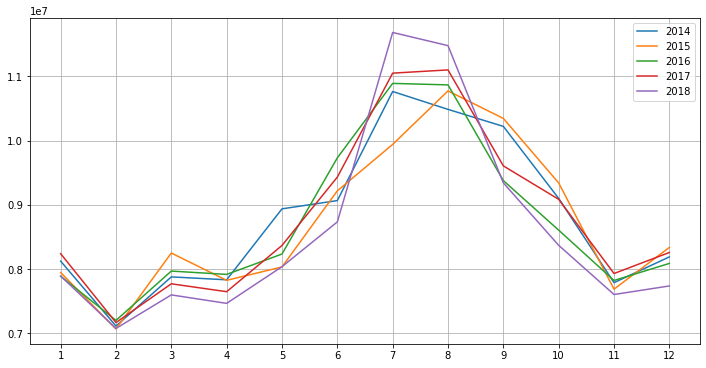

In [444]:
l=[]
plt.figure(figsize=(12,6))
for i in pivot:
     if i!=2019:
            dfi = pivot.loc[:,i]
            plt.plot(dfi.index.values,dfi)
            l.append(i)
plt.legend(l)
plt.xticks(range(1,13))
plt.grid()
plt.show()